In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr
import sys
from tqdm import tqdm
sys.path.append('../../fold_nucleation_time')



In [74]:
df = pd.DataFrame()
lineage_dict = {}
bestlog_dict = {}
log_dict = {}

workdir = "../../fold_nucleation_time/"
for log in tqdm(os.listdir(workdir)):
    path = os.path.join(workdir, log)
    if log.startswith('pfe50') and os.path.isdir(path) :
        lineage = pd.read_csv(workdir + log + '/visual_pfes_results/lineage.tsv', sep='\t', comment='#')
        bestlog = pd.read_csv(workdir + log + '/visual_pfes_results/bestlog.tsv', sep='\t', comment='#')
        progresslog = pd.read_csv(workdir + log + '/progress.log', sep='\t', comment='#')

        lineage_dict[log] = lineage
        bestlog_dict[log] = bestlog
        log_dict[log] = progresslog

100%|██████████| 249/249 [01:14<00:00,  3.35it/s]


In [73]:
lineage_lens = ([len(lineage_dict[f'pfe50_{i}']) for i in range(1,101)])
bestlog_lens = ([len(bestlog_dict[f'pfe50_{i}']) for i in range(1,101)])
log_lens = ([len(log_dict[f'pfe50_{i}']) for i in range(1,101)])



KeyError: 'pfe50_1'

(array([ 4.,  2.,  0.,  3.,  0.,  1.,  1.,  1.,  2.,  0.,  2.,  0.,  2.,
         0.,  0.,  3.,  0.,  0.,  0.,  2.,  1.,  3.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  2.,
         1.,  1.,  1.,  2.,  1.,  1.,  2.,  3.,  2.,  1., 50.]),
 array([ 150.,  187.,  224.,  261.,  298.,  335.,  372.,  409.,  446.,
         483.,  520.,  557.,  594.,  631.,  668.,  705.,  742.,  779.,
         816.,  853.,  890.,  927.,  964., 1001., 1038., 1075., 1112.,
        1149., 1186., 1223., 1260., 1297., 1334., 1371., 1408., 1445.,
        1482., 1519., 1556., 1593., 1630., 1667., 1704., 1741., 1778.,
        1815., 1852., 1889., 1926., 1963., 2000.]),
 <BarContainer object of 50 artists>)

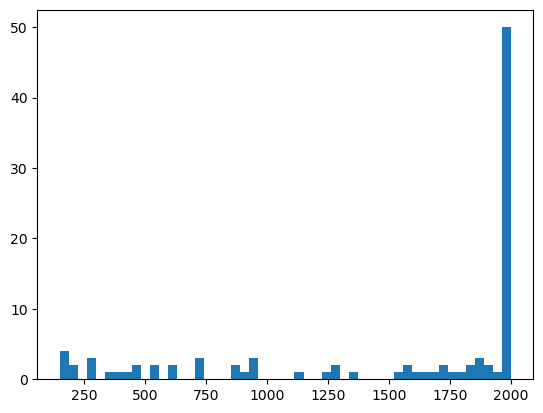

In [62]:
plt.scatter(df.ptm, df.mean_plddt)
pearsonr(df.ptm, df.mean_plddt)


In [ ]:
#log = pd.concat([df, df2.drop(df2['mutation'].index), df3.drop(df3['mutation'].index)])
log = pd.concat([df1, df2, df3])

In [ ]:
log = df1

In [ ]:
alphabet = list('ACDEFGHIKLMNPQRSTVWY')

three2one = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
     'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
     'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}

one2three ={}

uniprot = {'amino_acid': ['Leu', 'Ala', 'Gly', 'Val', 'Ser', 'Glu', 'Arg', 'Thr', 'Ile', 'Asp', 'Pro', 'Lys', 'Phe', 'Gln', 'Asn', 'Tyr', 'Met', 'His', 'Cys', 'Trp'],
'percent': [9.84, 9.00, 7.26, 6.86, 6.85, 6.25, 5.85, 5.56, 5.52, 5.48, 5.01, 4.95, 3.88, 3.81, 3.80, 2.88, 2.33, 2.23, 1.30, 1.30]}

#https://www.uniprot.org/uniprotkb/statistics#amino-acid-composition
swissprot = {'amino_acid': ['Leu', 'Ala', 'Gly', 'Val', 'Glu', 'Ser', 'Ile', 'Lys', 'Arg', 'Asp', 'Thr', 'Pro', 'Asn', 'Gln', 'Phe', 'Tyr', 'Met', 'His', 'Cys', 'Trp'],
'percent': [9.65, 8.26, 7.07, 6.86, 6.72, 6.65, 5.91, 5.80, 5.53, 5.46, 5.36, 4.75, 4.06, 3.93, 3.87, 2.92, 2.41, 2.28, 1.39, 1.10]}	

dfUP = pd.DataFrame(uniprot).sort_values('amino_acid')
dfSP = pd.DataFrame(swissprot).sort_values('amino_acid')
resdata = pd.DataFrame({'amino_acid': dfUP.amino_acid, 'UPpercent': dfUP.percent, 'SPpercent': dfSP.percent})
resdata.insert(loc=0, column='AA', value=[three2one[AA] for AA in resdata.amino_acid.str.upper()])
resdata_sorted = resdata.sort_values('AA')



In [ ]:
seqstrs = log[(log.ptm > 0.6) & (log.mean_plddt > 0.85)].drop_duplicates('sequence').sequence.str
len(seqstrs.len())

In [ ]:
AAoccurance = {AA: seqstrs.count(AA).sum() for AA in alphabet} 
n_allAA = sum(AAoccurance.values())
pfes_percent = {AA:round((AAoccurance[AA]/n_allAA) * 100, 3) for AA in AAoccurance}

In [ ]:
resdata_sorted['pfes_percent'] = pfes_percent.values()
resdata_sorted.reset_index(inplace = True, drop=True )


In [ ]:
resdata_sorted2 = resdata_sorted.drop(resdata_sorted[(resdata_sorted["AA"] == 'G') | (resdata_sorted["AA"] == 'L')].index)

x = resdata_sorted.UPpercent
y = resdata_sorted.pfes_percent



fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlim(0,12)
ax.set_ylim(0,12)
for i, res in enumerate(resdata_sorted.AA):
    ax.annotate(res, (x[i], y[i]))

m, b = np.polyfit(x, y, 1)
X_plot = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1], 100)
plt.plot(X_plot, m*X_plot + b, '-')
fig.set_size_inches(6, 6)

print(pearsonr(list(resdata_sorted.UPpercent), list(resdata_sorted.pfes_percent)))
print(pearsonr(list(resdata_sorted2.UPpercent), list(resdata_sorted2.pfes_percent)))

# Make substitution matrix 

In [ ]:
mutations_list = list(log[(log.mutation.str.contains('\.')) & (log.mean_plddt > 0.85)].drop_duplicates('sequence').mutation)
subst_list = [(m[0],m[-1]) for m in mutations_list]


In [ ]:
matrix=np.empty((20,20))
for a, i in zip(alphabet,range(20)):
    for b, j in zip(alphabet,range(20)):
        matrix[i][j] = subst_list.count((a,b))

for i in range(20): matrix[i][i] = 0 


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.imshow(matrix)
ax.xaxis.tick_top()
ticks = alphabet
plt.setp(ax, xticks=range(20), xticklabels=ticks, yticks=range(20), yticklabels=ticks, )

for (j,i),label in np.ndenumerate(matrix):
    ax.text(i,j,round(label),ha='center',va='center')


# Make substitution matrix 

In [23]:
df = pd.DataFrame()
stat_dict1 = {}
resultsdir = '../../fold_nucleation_time/'
for log in os.listdir(resultsdir):
    if log.startswith('pfnt') and os.path.isdir(resultsdir+'/'+log):
        print(resultsdir + log + '/progress.log')
        df = pd.read_csv(resultsdir + log + '/progress.log', sep='\t', comment='#')
        boolist = (df['mean_plddt'] > 0.7) & (df['ptm'] > 0.7) & (df['seq_len'] > 50)
        i=0
        for line  in boolist:
            if line == True:
                stat_dict1[log] = i
                print(f'fold evolver after {i} mutatins')
                break
            i+=1

../../fold_nucleation_time/pfnt1/progress.log
../../fold_nucleation_time/pfnt10/progress.log
../../fold_nucleation_time/pfnt11/progress.log
../../fold_nucleation_time/pfnt12/progress.log
../../fold_nucleation_time/pfnt13/progress.log
../../fold_nucleation_time/pfnt14/progress.log
../../fold_nucleation_time/pfnt15/progress.log
fold evolver after 22800 mutatins
../../fold_nucleation_time/pfnt16/progress.log
../../fold_nucleation_time/pfnt17/progress.log
../../fold_nucleation_time/pfnt18/progress.log
../../fold_nucleation_time/pfnt19/progress.log
../../fold_nucleation_time/pfnt2/progress.log
fold evolver after 9300 mutatins
../../fold_nucleation_time/pfnt20/progress.log
fold evolver after 1800 mutatins
../../fold_nucleation_time/pfnt21/progress.log
../../fold_nucleation_time/pfnt22/progress.log
../../fold_nucleation_time/pfnt23/progress.log
../../fold_nucleation_time/pfnt24/progress.log
../../fold_nucleation_time/pfnt25/progress.log
../../fold_nucleation_time/pfnt3/progress.log
../../fold

In [ ]:
df = pd.DataFrame()
stat_dict2 = {}
resultsdir = '../../SFE_RESULTS2/'
for log in os.listdir(resultsdir):
    if log.startswith('SF2pfes'):
        print(resultsdir + log + '/progress.log')
        df = pd.read_csv(resultsdir + log + '/progress.log', sep='\t', comment='#')
        boolist = (df['mean_plddt'] > 0.7) & (df['ptm'] > 0.7) & (df['seq_len'] > 50)
        i=0
        for line  in boolist:
            if line == True:
                stat_dict2[log] = i
                print(f'fold evolver after {i} mutatins')
                break
            i+=1

In [ ]:
df = pd.DataFrame()
stat_dict3 = {}
resultsdir = '../../SFE_RESULTS3/'
for log in os.listdir(resultsdir):
    if log.startswith('SF3pfes'):
        print(resultsdir + log + '/progress.log')
        df = pd.read_csv(resultsdir + log + '/progress.log', sep='\t', comment='#')
        boolist = (df['mean_plddt'] > 0.7) & (df['ptm'] > 0.7) & (df['seq_len'] > 50)
        i=0
        for line  in boolist:
            if line == True:
                stat_dict3[log] = i
                print(f'fold evolver after {i} mutatins')
                break
            i+=1

In [ ]:
df = pd.DataFrame()
stat_dict4 = {}
resultsdir = '../../IFE_RESULTS/'
for log in os.listdir(resultsdir):
    if log.startswith('inter_hth_'):
        print(resultsdir + log + '/progress.log')
        df = pd.read_csv(resultsdir + log + '/progress.log', sep='\t', comment='#')
        boolist = (df['mean_plddt'] > 0.7) & (df['ptm'] > 0.7) & (df['seq_len'] > 50)
        i=0
        for line  in boolist:
            if line == True:
                stat_dict4[log] = i
                print(f'fold evolver after {i} mutatins')
                break
            i+=1

In [21]:
alldicts = stat_dict1  | stat_dict3 | stat_dict2

NameError: name 'stat_dict3' is not defined

In [ ]:
alldicts.pop('SFpfes3_optimization')

Text(0.5, 0, 'Number of mutations')

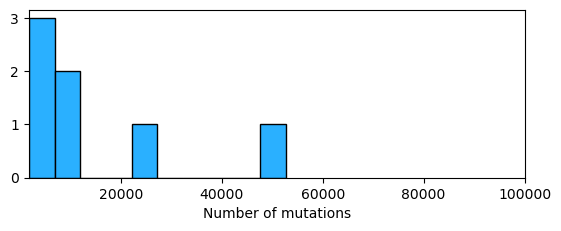

In [24]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')

data = list(stat_dict1.values())
x = data

# histogram on linear scale
plt.subplot(211)
hist, bins, _ = plt.hist(x, bins=10,  facecolor = '#2ab0ff', edgecolor='black', linewidth=1,)
plt.xlim(12**3,10**5)
plt.xlabel('Number of mutations')

#plt.grid(True, which="both")



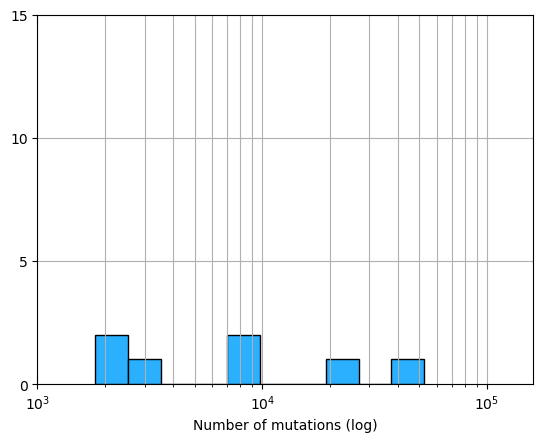

In [25]:
# histogram on log scale. 
# Use non-equal bin sizes, such that they look equal on log scale.
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
#plt.subplot(211)
plt.hist(x, bins=logbins,  facecolor = '#2ab0ff', edgecolor='black', linewidth=1,)
plt.xlabel('Number of mutations (log)')
plt.grid(True, which="both")


plt.xscale('log')
plt.xlim(10**3,11**5)
plt.ylim(0,15)
plt.yticks([0,5,10,15])
plt.show()
